In [1]:
import pandas as pd

# Membuat dataset
data = {
    'jumlah_kecelakaan': [3, 1, 4, 0, 2, 6, 3, 8, 2, 5],
    'volume_lalu_lintas': [1200, 800, 1500, 400, 1000, 1700, 1300, 1600, 900, 1400],
    'jumlah_lampu_lalu_lintas': [2, 1, 3, 1, 2, 3, 2, 4, 1, 3]
}

df = pd.DataFrame(data)
print(df)


   jumlah_kecelakaan  volume_lalu_lintas  jumlah_lampu_lalu_lintas
0                  3                1200                         2
1                  1                 800                         1
2                  4                1500                         3
3                  0                 400                         1
4                  2                1000                         2
5                  6                1700                         3
6                  3                1300                         2
7                  8                1600                         4
8                  2                 900                         1
9                  5                1400                         3


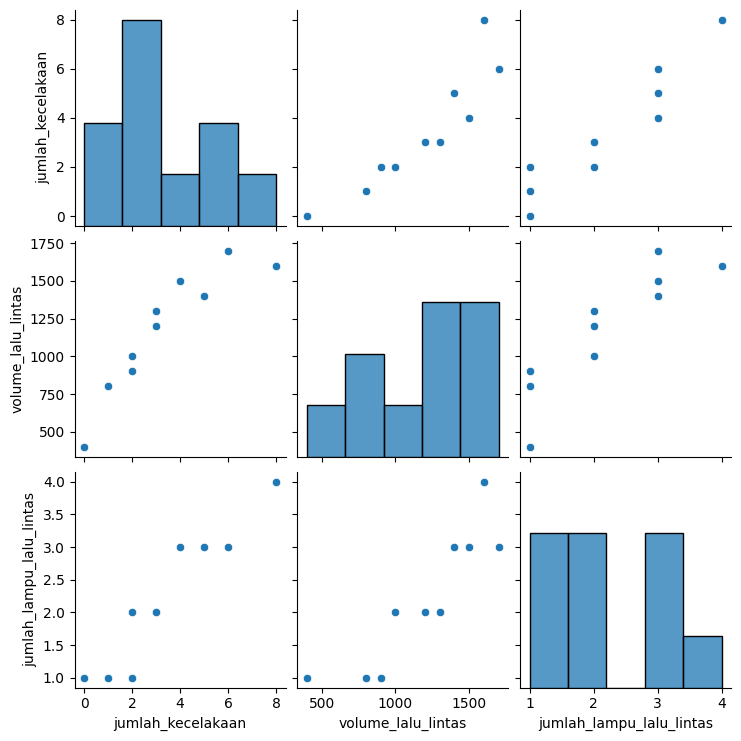

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.pairplot(df)
plt.show()


In [3]:
import statsmodels.api as sm
import numpy as np

# Menambahkan intercept ke dalam model
df['intercept'] = 1

# Mendefinisikan variabel independen dan dependen
X = df[['intercept', 'volume_lalu_lintas', 'jumlah_lampu_lalu_lintas']]
y = df['jumlah_kecelakaan']

# Membangun model regresi Poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:      jumlah_kecelakaan   No. Observations:                   10
Model:                            GLM   Df Residuals:                        7
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.836
Date:                Fri, 21 Jun 2024   Deviance:                       2.1197
Time:                        11:34:39   Pearson chi2:                     1.54
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7845
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [4]:
# Prediksi jumlah kecelakaan
df['predicted'] = poisson_model.predict(X)

# Melihat hasil prediksi vs nilai aktual
print(df[['jumlah_kecelakaan', 'predicted']])


   jumlah_kecelakaan  predicted
0                  3   2.546991
1                  1   1.116050
2                  4   5.034175
3                  0   0.627931
4                  2   1.910476
5                  6   6.711418
6                  3   2.940833
7                  8   7.463512
8                  2   1.288625
9                  5   4.359989
